# Examples for using `avaread`

Below are some examples that demonstrate how to get both data and metadata from different file types using `avaread.read_file`.

This function only takes a file path as an argument and will return an instance of either `avaread.AVSFile` or `avaread.STRFile` depending on the detected file type.

Let's first set things up for a demonstration.

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt

import avaread

normal_files = list(Path("../tests/test_files/").glob("*.raw8"))
sequence_files = list(Path("../tests/test_files/").glob("*.str8"))

## Reading multichannel files (`*.raw8`,`*.rir8`,etc)

Multichannel files store a spectrum from one or more devices, or channels.

You can easily iterate over the `AVSFile` container, to access the individual `AVSChannel`s that are contained within.

Each `AVSChannel` can have a different size sensor, exposure time, etc. and therefore stores this information itself.

This information can be easily retrieved using attribute access (e.g. `channel.ID.SerialNumber` or `channel.exposure`).

To access the raw data, dark and reference spectra stored for each channel, you can use the `scope`, `dark` and `ref` attributes, while the `signal` attribute returns the dark-corrected signal.

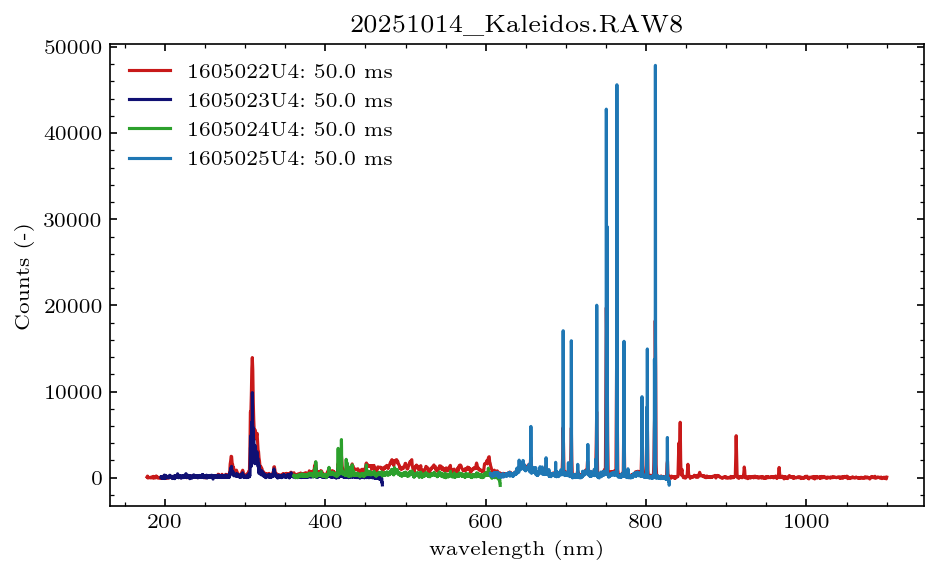

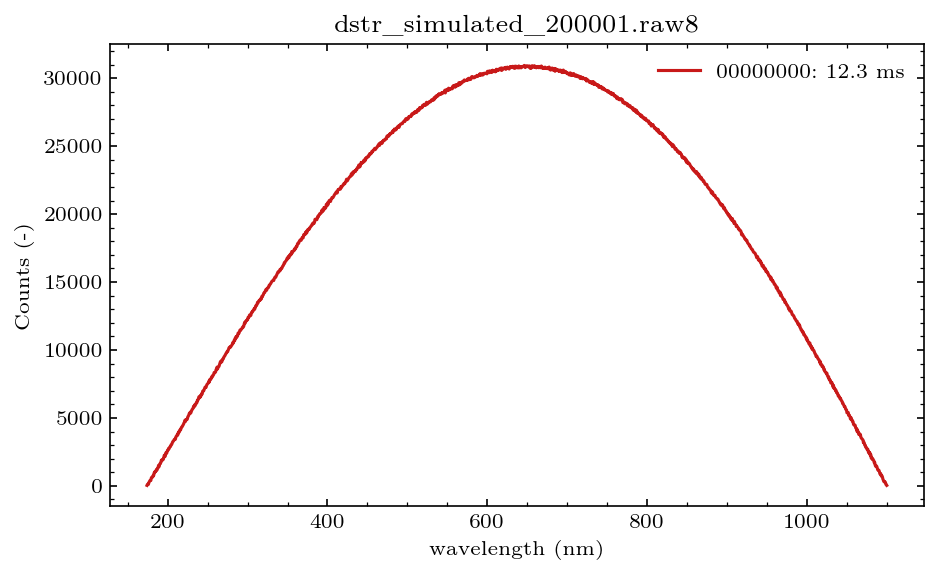

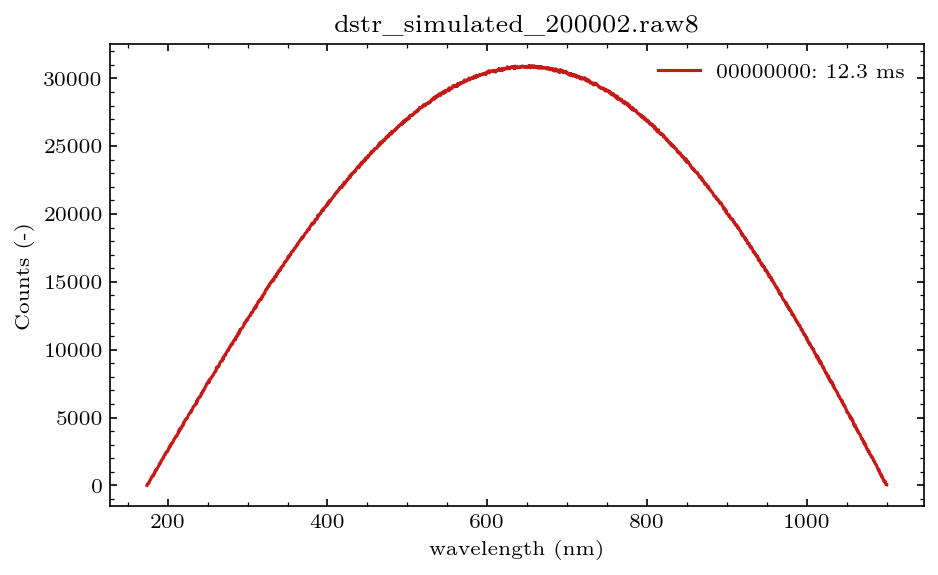

In [2]:
for f in normal_files:
    file = avaread.read_file(f)
    plt.figure()
    plt.title(file.name)
    for channel in file:
        plt.plot(channel.wavelength, channel.signal, label=f"{channel.ID.SerialNumber}: {channel.exposure:.1f} ms")
    plt.legend()
    plt.xlabel("wavelength (nm)")
    plt.ylabel("Counts (-)")

## Reading store-to-RAM files (`*.str8`,etc.)

Store-to-RAM files store a series of spectra acquired by a single channel.

Instead of multiple `AVSChannel`s nested in a `AVSFile` container, the `STRFile` object immediatly gives access to all the data.


When you iterate over it, you iterate over the `frames` stored within.

The metadata, such as device serial number and exposure time is the same for all frames, and therefore accesible on the `STFile` object itself.

Each frame is simply a numpy array of data, containing the background-corrected spectrum.

If you want the uncorrected data, it can be accessed via the `scope` attibute, similar to an `AVSChannel`.


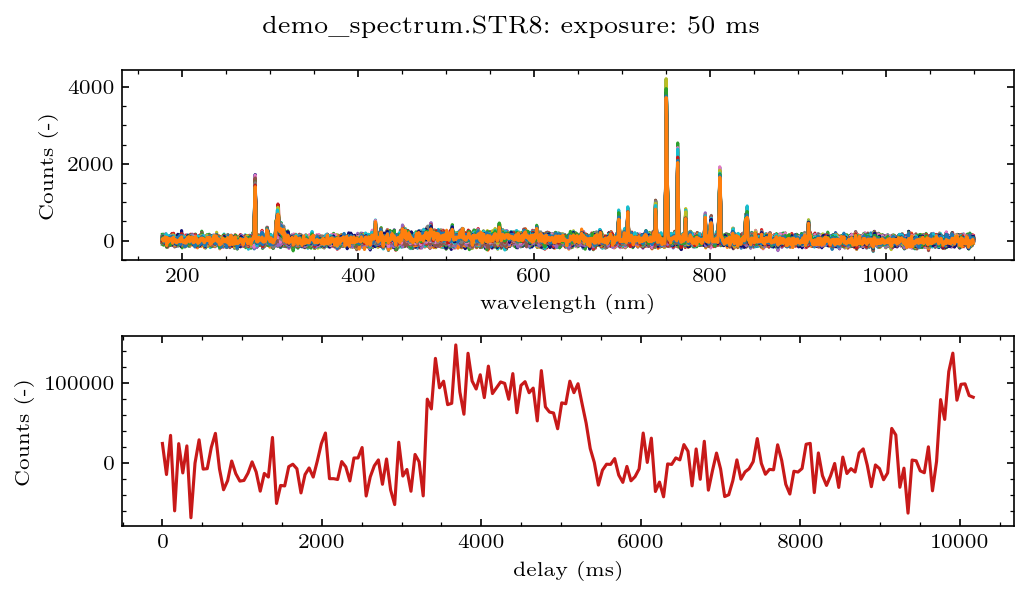

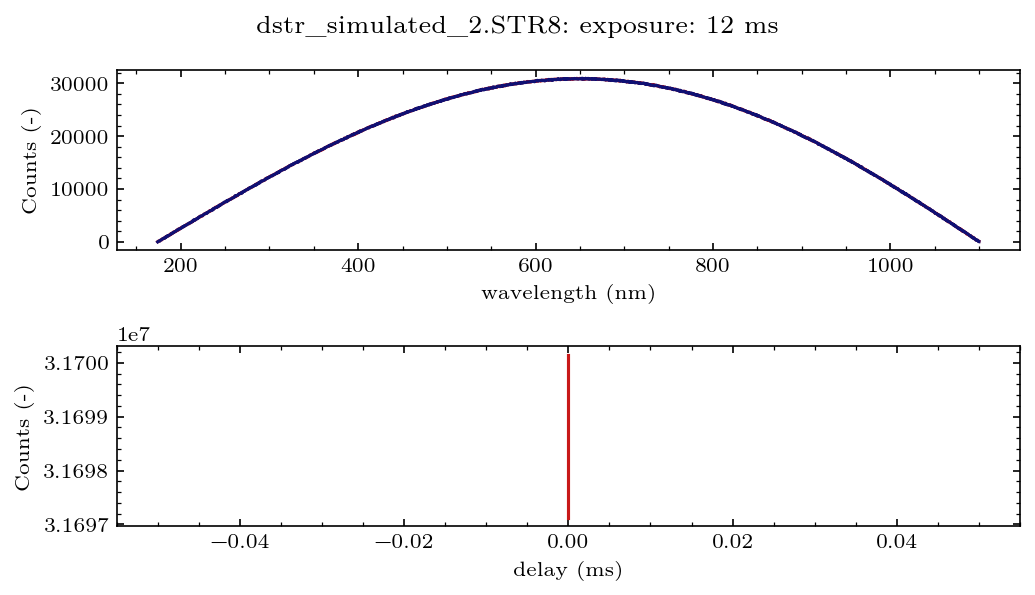

In [3]:
for f in sequence_files:
    file = avaread.read_file(f)
    fig, ax = plt.subplots(2, 1)
    ax[0].set_xlabel("wavelength (nm)")
    ax[1].set_xlabel("delay (ms)")
    fig.suptitle(f"{file.name}: exposure: {file.exposure:.2g} ms")
    for a in ax:
        a.set_ylabel("Counts (-)")

    for frame in file:
        ax[0].plot(file.wavelength, frame)

    ax[1].plot(file.delay, [frame.sum() for frame in file])
    fig.tight_layout()